## EDA

In [14]:
import pandas as pd
import sys, os

sys.path.append(os.path.abspath(os.path.join('../utils')))

In [15]:
from eda_helpers import EDA
from data_processing import DataProcessor
from plot import Plotter

In [16]:
eda = EDA('../data/processed')
eda.load_cleaned_data()
plotter=Plotter()

In [17]:
data_processer=DataProcessor()

In [18]:
cleaned_trips_df = eda.cleaned_trip
cleaned_requests_df = eda.cleaned_requests

In [19]:
cleaned_trips_df

,order_id,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
534363,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
534364,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
534365,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
534366,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


In [20]:
cleaned_requests_df

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877


## Weekend or Weekdays

In [21]:
cleaned_trips_df['is_weekend'] = cleaned_trips_df['Trip Start Time'].apply(lambda x: data_processer.isWeekend(x))

In [22]:
cleaned_trips_df['is_weekend'].value_counts()

is_weekend
0    427181
1    107187
Name: count, dtype: int64

## chart for weekend

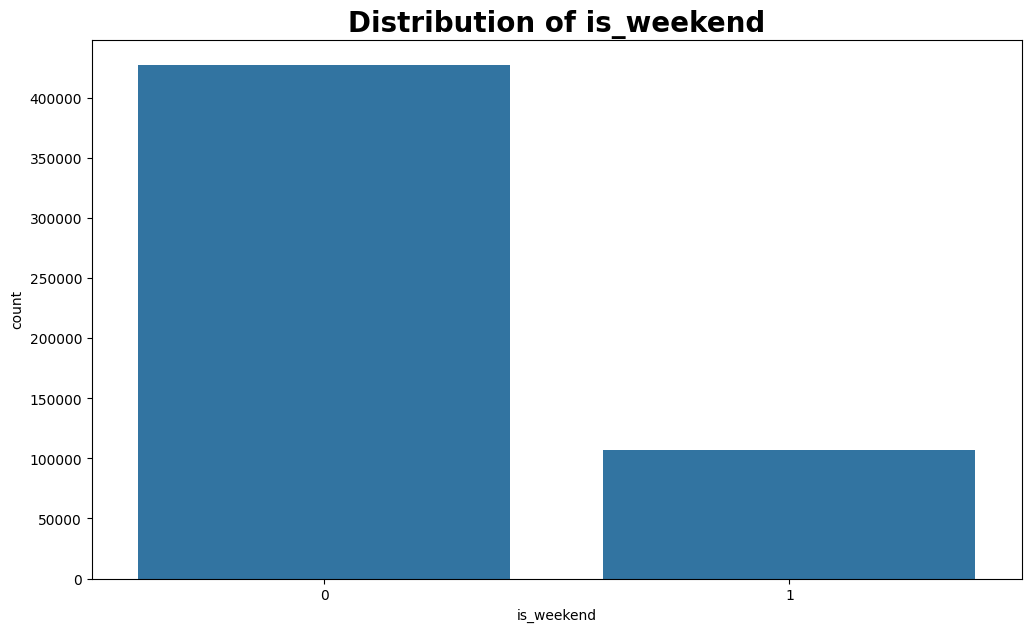

In [23]:
plotter.plot_count(cleaned_trips_df, 'is_weekend')

## Holiday or not Holiday

In [24]:
cleaned_trips_df['is_holiday'] = cleaned_trips_df['Trip Start Time'].apply(lambda x: data_processer.isHoliday(x))

In [25]:
cleaned_trips_df['is_holiday'].value_counts()

is_holiday
0    518151
1     16217
Name: count, dtype: int64

In [27]:
import holidays

ng_holidays = holidays.country_holidays('NG')

year = 2021  # Replace with the desired year

holidays_in_year = [(date, name) for date, name in ng_holidays.items() if date.year == year]

print("Number of holidays in NG calendar in", year, ":", len(holidays_in_year))

Number of holidays in NG calendar in 2024 : 0
